# Непрерывные распределения

In [1]:
import numpy as np
from scipy.stats import cauchy, expon
from matplotlib.patches import Polygon

import matplotlib.pyplot as plt

## Пример 1: Распределение Коши

Рассмотрим распределение Коши с функций плотность и распределения

$$
\begin{aligned}
	f(x)&=\frac{1}{\pi(1+x^2)} & F(x)&=\frac{1}{\pi}arctg(x)+\frac 12=\int_{-\infty}^x f(t)dt
\end{aligned}
$$

In [2]:
rv = cauchy()

### Графики плотности и распределения

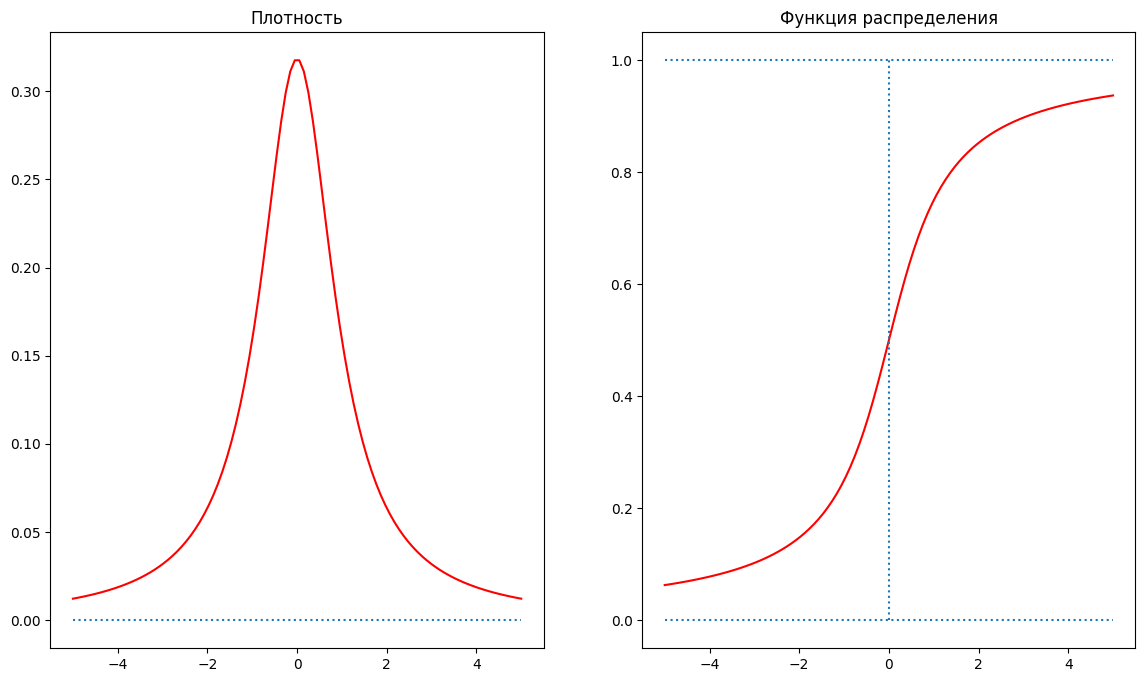

In [3]:
x_min, x_max = -5, 5
x_grid = np.linspace(x_min, x_max, 100)

fig, axs =  plt.subplots(nrows=1, ncols=2, figsize=(14, 8))

axs[0].plot(x_grid, rv.pdf(x_grid), 'r')
axs[1].plot(x_grid, rv.cdf(x_grid), 'r')

axs[0].set_title('Плотность')
axs[1].set_title('Функция распределения')

axs[0].hlines(0, x_min, x_max, linestyles='dotted')
axs[1].hlines(0, x_min, x_max, linestyles='dotted')
axs[1].hlines(1, x_min, x_max, linestyles='dotted')
axs[1].vlines(0, 0, 1, linestyles='dotted')

plt.show()

### Связь плотности и распределения

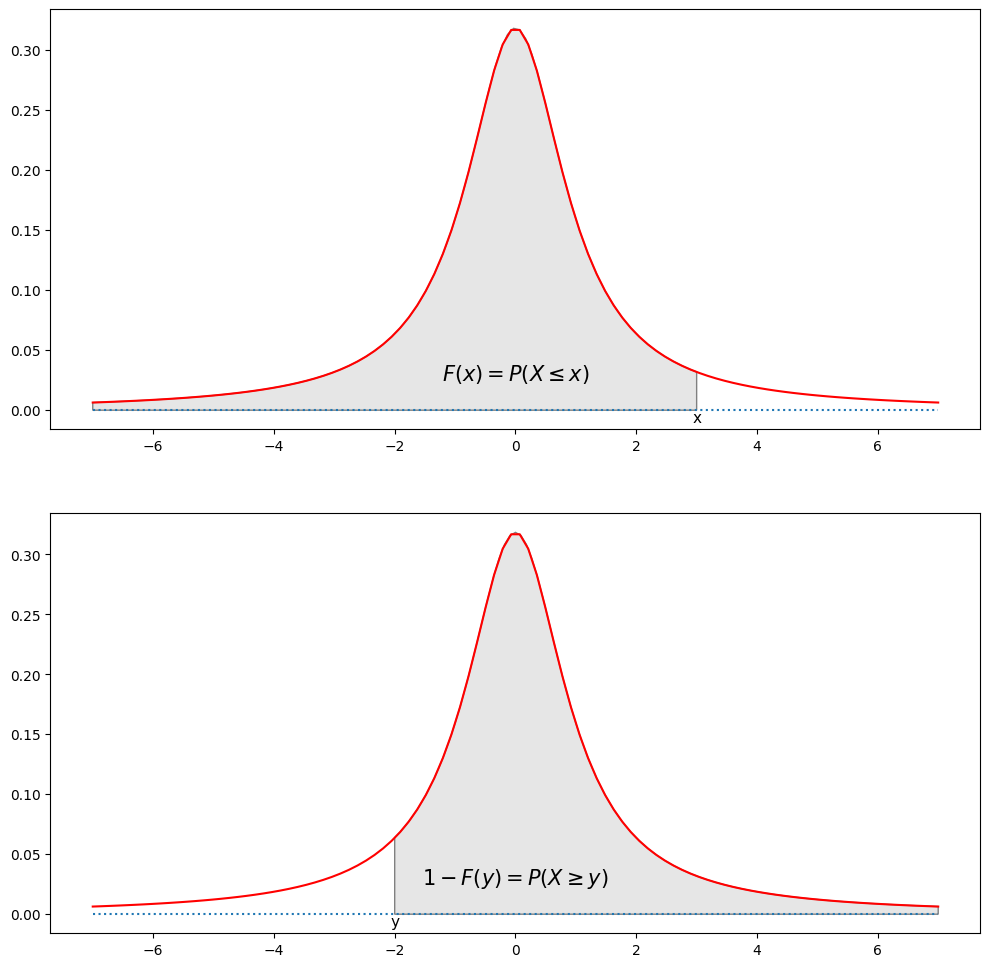

In [4]:
x_min, x_max = -7, 7
x_grid = np.linspace(x_min, x_max, 100)

y, x = -2, 3

fig, ax = plt.subplots(2, 1, figsize=(12, 12))

ax[0].plot(x_grid, rv.pdf(x_grid), 'r')
ax[1].plot(x_grid, rv.pdf(x_grid), 'r')

ix = np.linspace(x_min, x, 100)
iy = rv.pdf(ix)

verts = [(x_min, 0), *zip(ix, iy), (x, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax[0].add_patch(poly)
ax[0].text(0, 0.025, r"$F(x)=P(X\leq x)$", horizontalalignment='center', fontsize=15)

ix = np.linspace(y, x_max, 100)
iy = rv.pdf(ix)

verts = [(y, 0), *zip(ix, iy), (x_max, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax[1].add_patch(poly)
ax[1].text(0, 0.025, r"$1-F(y)=P(X\geq y)$", horizontalalignment='center', fontsize=15)

ax[0].hlines(0, x_min, x_max, linestyles='dotted')
ax[1].hlines(0, x_min, x_max, linestyles='dotted')

ax[0].text(x, 0, f"x", horizontalalignment='center', verticalalignment='top', fontsize=11)
ax[1].text(y, 0, f"y", horizontalalignment='center', verticalalignment='top', fontsize=11)

plt.show()

### Плотность и вычисление вероятностей

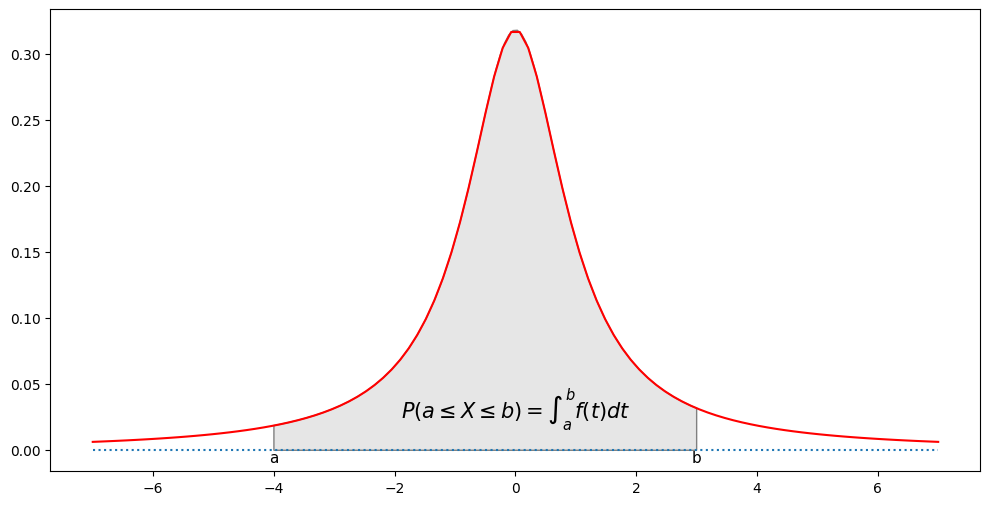

In [5]:
x_min, x_max = -7, 7
x_grid = np.linspace(x_min, x_max, 100)

a, b = -4, 3

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(x_grid, rv.pdf(x_grid), 'r')

ix = np.linspace(a, b, 100)
iy = rv.pdf(ix)

verts = [(a, 0), *zip(ix, iy), (b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)
ax.text(0, 0.025, r"$P(a\leq X\leq b)=\int_a^b f(t)dt$", horizontalalignment='center', fontsize=15)

ax.hlines(0, x_min, x_max, linestyles='dotted')
ax.text(a, 0, f"a", horizontalalignment='center', verticalalignment='top', fontsize=11)
ax.text(b, 0, f"b", horizontalalignment='center', verticalalignment='top', fontsize=11)

plt.show()

### Квантиль и медиана

Для заданного $p\in(0,1)$ решаем уравнение $F(x)=p$

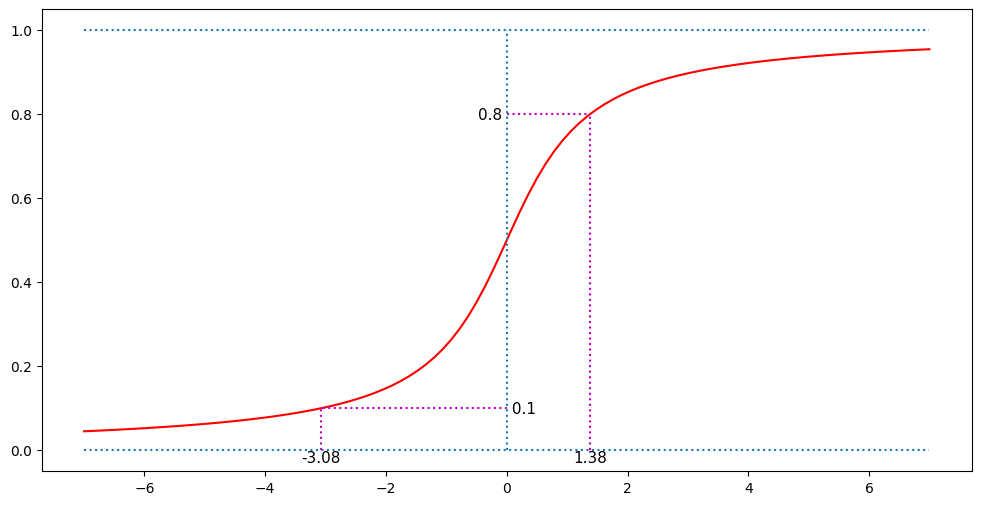

In [6]:
x_min, x_max = -7, 7
x_grid = np.linspace(x_min, x_max, 100)

p1, p2 = 0.1, 0.8

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(x_grid, rv.cdf(x_grid), 'r')

ax.hlines(0, x_min, x_max, linestyles='dotted')
ax.hlines(1, x_min, x_max, linestyles='dotted')
ax.vlines(0, 0, 1, linestyles='dotted')

ax.hlines(p1, 0, rv.ppf(p1), linestyles='dotted', colors='m')
ax.vlines(rv.ppf(p1), 0, p1, linestyles='dotted', colors='m')
ax.text(0, p1, f" {p1}", horizontalalignment='left', verticalalignment='center', fontsize=11)
ax.text(rv.ppf(p1), 0, f"{rv.ppf(p1).round(2)}", horizontalalignment='center', verticalalignment='top', fontsize=11)


ax.hlines(p2, 0, rv.ppf(p2), linestyles='dotted', colors='m')
ax.vlines(rv.ppf(p2), 0, p2, linestyles='dotted', colors='m')
ax.text(0, p2, f"{p2} ", horizontalalignment='right', verticalalignment='center', fontsize=11)
ax.text(rv.ppf(p2), 0, f"{rv.ppf(p2).round(2)}", horizontalalignment='center', verticalalignment='top', fontsize=11)

plt.show()

## Пример 2: Экспоненциальное распределение

Рассмотрим экспоненциальное распределение с функций плотность и распределения

$$
\begin{aligned}
	f(x)&=\begin{cases} \exp(-x), & x\geq0 \\ 0, & x<0 \end{cases} & F(x)&=\begin{cases} 1-\exp(-x), & x\geq0 \\ 0, & x<0 \end{cases}
\end{aligned}
$$

In [7]:
rv = expon()

### Графики плотности и распределения

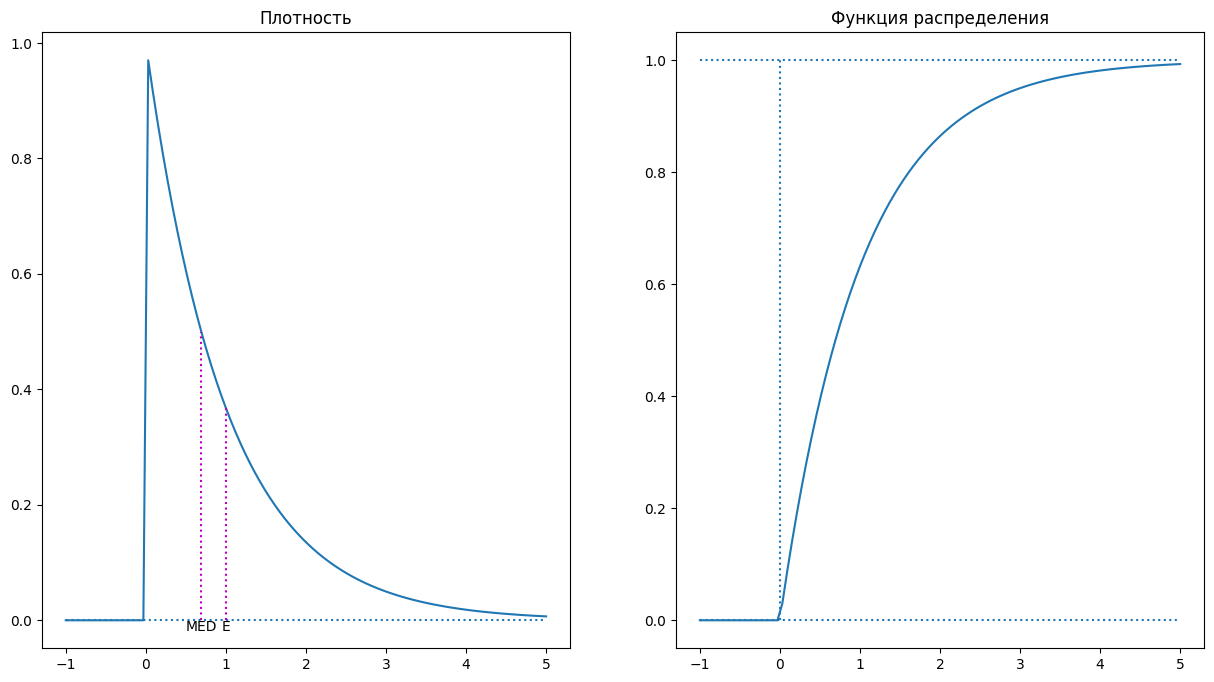

In [8]:
x_min, x_max = -1, 5
x = np.linspace(x_min, x_max, 100)

fig, axs =  plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

axs[0].plot(x, rv.pdf(x))
axs[1].plot(x, rv.cdf(x))

axs[0].set_title('Плотность')
axs[1].set_title('Функция распределения')

axs[0].hlines(0, x_min, x_max, linestyles='dotted')
axs[1].hlines(0, x_min, x_max, linestyles='dotted')
axs[1].hlines(1, x_min, x_max, linestyles='dotted')
axs[1].vlines(0, 0, 1, linestyles='dotted')

axs[0].vlines(rv.mean(), 0, rv.pdf(rv.mean()), linestyles='dotted', colors='m')
axs[0].vlines(rv.median(), 0, rv.pdf(rv.median()), linestyles='dotted', colors='m')

axs[0].text(rv.mean(), 0, f"E", horizontalalignment='center', verticalalignment='top', fontsize=10)
axs[0].text(rv.median(), 0, f"MED", horizontalalignment='center', verticalalignment='top', fontsize=10)

plt.show()

### Плотность и вычисление вероятностей

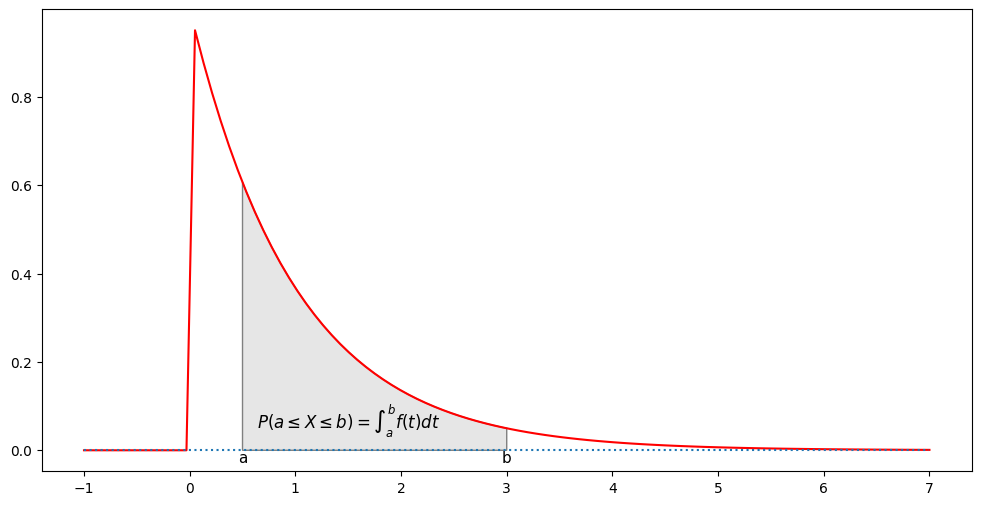

In [9]:
x_min, x_max = -1, 7
x_grid = np.linspace(x_min, x_max, 100)

a, b = 0.5, 3

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(x_grid, rv.pdf(x_grid), 'r')

ix = np.linspace(a, b, 100)
iy = rv.pdf(ix)

verts = [(a, 0), *zip(ix, iy), (b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)
ax.text(1.5, 0.025, r"$P(a\leq X\leq b)=\int_a^b f(t)dt$", horizontalalignment='center', verticalalignment='bottom', fontsize=12)

ax.hlines(0, x_min, x_max, linestyles='dotted')
ax.text(a, 0, f"a", horizontalalignment='center', verticalalignment='top', fontsize=11)
ax.text(b, 0, f"b", horizontalalignment='center', verticalalignment='top', fontsize=11)

plt.show()

### Квантили

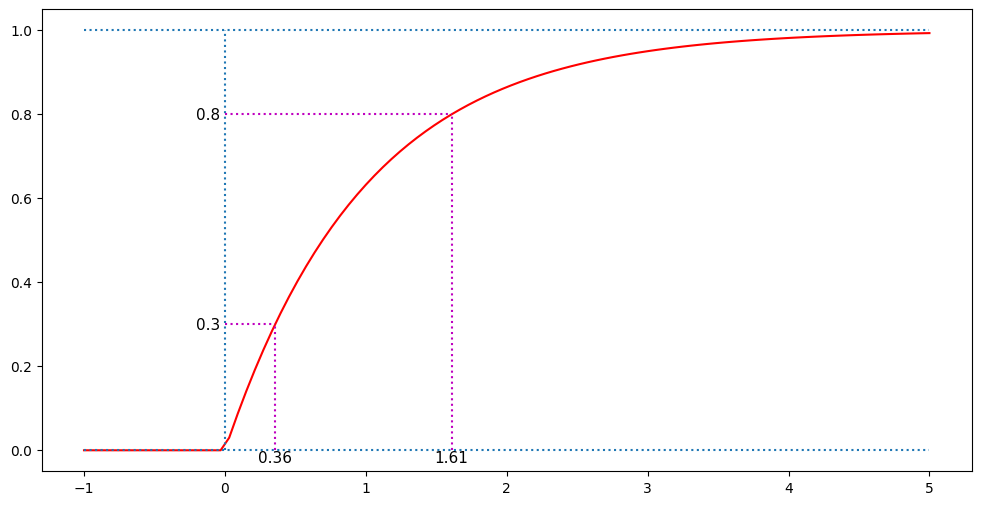

In [10]:
x_min, x_max = -1, 5
x_grid = np.linspace(x_min, x_max, 100)

p1, p2 = 0.3, 0.8

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(x_grid, rv.cdf(x_grid), 'r')

ax.hlines(0, x_min, x_max, linestyles='dotted')
ax.hlines(1, x_min, x_max, linestyles='dotted')
ax.vlines(0, 0, 1, linestyles='dotted')

ax.hlines(p1, 0, rv.ppf(p1), linestyles='dotted', colors='m')
ax.vlines(rv.ppf(p1), 0, p1, linestyles='dotted', colors='m')
ax.text(0, p1, f"{p1} ", horizontalalignment='right', verticalalignment='center', fontsize=11)
ax.text(rv.ppf(p1), 0, f"{rv.ppf(p1).round(2)}", horizontalalignment='center', verticalalignment='top', fontsize=11)


ax.hlines(p2, 0, rv.ppf(p2), linestyles='dotted', colors='m')
ax.vlines(rv.ppf(p2), 0, p2, linestyles='dotted', colors='m')
ax.text(0, p2, f"{p2} ", horizontalalignment='right', verticalalignment='center', fontsize=11)
ax.text(rv.ppf(p2), 0, f"{rv.ppf(p2).round(2)}", horizontalalignment='center', verticalalignment='top', fontsize=11)

plt.show()